In [5]:
import numpy as np
import pandas as pd
import uproot as ur

%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.rc('figure', facecolor='w', figsize=(10,10))
plt.rc('axes', labelsize=24)
plt.rc('axes', titlesize=24)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)

In [6]:
df_dict = {}
df_exp_dict = {}

#runs = ['1', '2', '3', '4', '501', '502', '503', '6789', 'untag', 'VBF', 'all']
runs = ['all']
#runs = ['1', '2', '3', '4', '501', '502', '503', '6789']
masses = [120, 121, 122, 123, 124, 125, 125.38, 126, 127, 128, 129, 130]

In [7]:
for run in runs:
    df_list = []
    for mass in masses:
        df = ur.open(f'../data/james_limits/turnon_v2/limits_vs_mass/higgsCombine{run}.AsymptoticLimits.mH{mass}.root')['limit'].pandas.df()
        df_list.append(df)
    df_dict[run] = pd.concat(df_list)

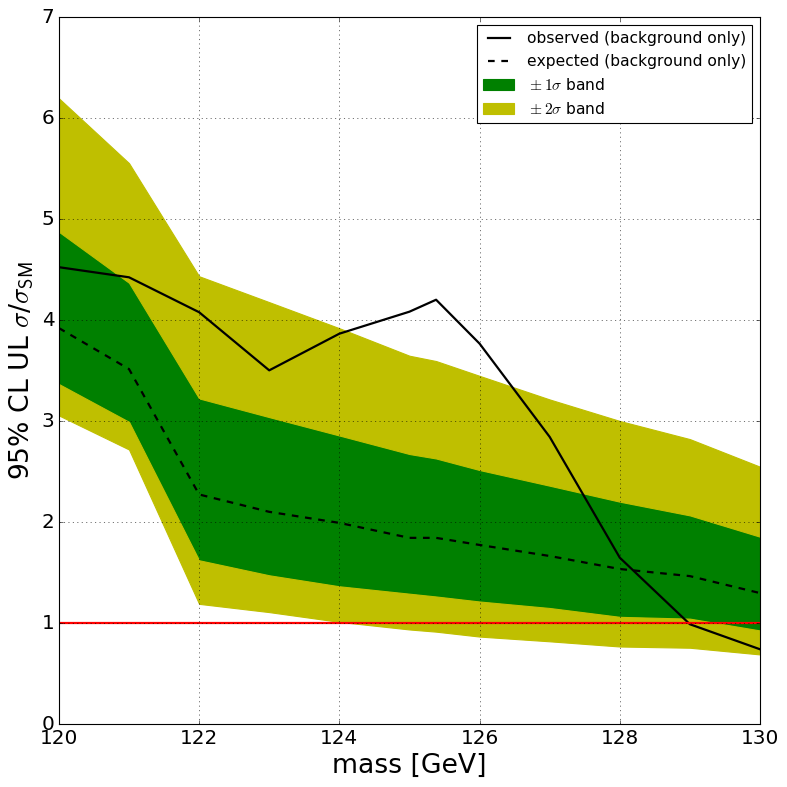

In [8]:
for run in runs:

    #mH = np.linspace(120., 130., num=11)
    mH = np.array([120., 121., 122., 123., 124., 125., 125.38, 126., 127., 128., 129., 130.])

    fig, ax = plt.subplots()
    ax.plot(mH, df_dict[run].query('quantileExpected < 0')['limit'], color='k', linewidth=2,
            label='observed (background only)');
    ax.plot(mH, df_dict[run].query('quantileExpected == 0.5')['limit'], 
            color='k', linestyle='--', linewidth=2, label='expected (background only)');
    ax.fill_between(mH, df_dict[run].query('quantileExpected == 0.16')['limit'],
                        df_dict[run].query('quantileExpected == 0.84')['limit'],
                   color='g', label='$\sf \pm 1\sigma$ band');
    ax.fill_between(mH, df_dict[run].query('quantileExpected == 0.84')['limit'],
                        df_dict[run].query('quantileExpected == 0.975')['limit'],
                   color='y', label='$\sf \pm 2\sigma$ band');
    ax.fill_between(mH, df_dict[run].query('quantileExpected == 0.025')['limit'],
                        df_dict[run].query('quantileExpected == 0.16')['limit'],
                   color='y')

    ax.axhline(1., color='r', linewidth=2)

    ax.set_xlabel('mass [GeV]');
    ax.set_ylabel('95% CL UL $\sf \sigma$/$\sf \sigma_{SM}$');

    ax.grid(linestyle=':')

    ax.legend(prop={'size': 14});
    plt.tight_layout();
    
    plt.savefig(f'../plots/limits_vs_mass/turnon_v2/limit_vs_mass_unblind_cat_{run}_turnon_06-21-21.png')

In [ ]:
for run in runs:
    df_list = []
    df_exp_list = []
    for mass in masses:
        df = ur.open(f'../data/james_limits/turnon_v2/significances_vs_mass/higgsCombine{run}.Significance.mH{mass}.root')['limit'].pandas.df()
        df_exp = ur.open(f'../data/james_limits/turnon_v2/significances_vs_mass/higgsCombine{run}_exp.Significance.mH{mass}.root')['limit'].pandas.df()
        df_list.append(df)
        df_exp_list.append(df_exp)
    df_dict[run] = pd.concat(df_list)
    df_exp_dict[run] = pd.concat(df_exp_list)

In [ ]:
df_dict['all'].query('125. < mh < 126.')['limit']

In [ ]:
for run in runs:

    #mH = np.linspace(120., 130., num=11)
    mH = np.array([120., 121., 122., 123., 124., 125., 125.38, 126., 127., 128., 129., 130.])

    fig, ax = plt.subplots()
    ax.plot(mH, df_dict[run]['limit'], color='k', linewidth=2, label='observed');
    ax.plot(mH, df_exp_dict[run]['limit'], color='k', linestyle='--', linewidth=2, label='expected ($\sf \mu = 1$)');
    
    ax.set_ylim(0., 4.5)

    ax.set_xlabel('mass [GeV]');
    ax.set_ylabel('significance ($\sf \sigma$)');
    ax.legend();

    ax.grid(linestyle=':')

    plt.tight_layout();
    
    plt.savefig(f'../plots/significance_vs_mass/turnon_v2/significance_vs_mass_unblind_cat_{run}_turnon_06-22-21.png')

In [ ]:
print(df_dict['full'].query('125 < mh < 126')['limit'])
print(df_exp_dict['full'].query('125 < mh < 126')['limit'])

In [ ]:
df_dict['full'].mh.value_counts()